# Importing Necessary Libraries, Reading Original Data and its Description

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
dt=pd.read_excel(r"C:\Users\Sahil Kumar\OneDrive\Desktop\Data Science\Semester-2\Capstone Project 1\E Commerce Dataset.xlsx",sheet_name='E Comm')

In [3]:
dt.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
data=dt.copy()

# EDA & Feature Engineering

#### Checking columns, their datatypes & renaming any of them, if necessary

In [6]:
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
data.dtypes[data.dtypes!='object'].index

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [8]:
data.dtypes[data.dtypes=='object'].index

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [9]:
data.rename(columns={'PreferedOrderCat':'PreferredOrderCategory',
                     'OrderAmountHikeFromlastYear':'OrderCountHikeFromLastYear'},inplace=True)

#### Checking unique values of each column

In [10]:
def unique(col):
    """This function returns distinct values of the given column (arguement - 'col') of dataframe 'data'"""
    x=data[col].unique()
    return x

In [11]:
data['CustomerID'].duplicated().sum() # to confirm if the data has not any duplicate customer IDs

0

In [12]:
unique('PreferredLoginDevice')

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [13]:
# In column 'PreferredLoginDevice', Phone & Mobile Phone are same. Therefore, they should be merged into one login device.

In [14]:
unique('CityTier')

array([3, 1, 2], dtype=int64)

In [15]:
unique('PreferredPaymentMode')

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [16]:
# In column 'PreferredPaymentMode', CC & COD are short forms of Credit Card & Cash on Delivery respectively. Therefore,
# preferred payment modes CC & COD should be merged into Credit Card & Cash on Delivery respectively

In [17]:
unique('Gender')

array(['Female', 'Male'], dtype=object)

In [18]:
unique('PreferredOrderCategory')

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [19]:
# In column 'PreferredOrderCategory', Mobile & Mobile Phone are same. Therefore, they should be merged into one category.

In [20]:
unique('SatisfactionScore')

array([2, 3, 5, 4, 1], dtype=int64)

In [21]:
unique('MaritalStatus')

array(['Single', 'Divorced', 'Married'], dtype=object)

In [22]:
unique('Complain')

array([1, 0], dtype=int64)

#### Fixing values of those columns having same values with different names

In [23]:
data['PreferredLoginDevice']=data['PreferredLoginDevice'].replace(['Mobile Phone','Phone'],'Mobile')

In [24]:
data['PreferredPaymentMode']=data['PreferredPaymentMode'].replace({'CC':'Credit Card','COD':'Cash on Delivery'})

In [25]:
data['PreferredOrderCategory']=data['PreferredOrderCategory'].replace('Mobile','Mobile Phone')

## Univariate Analysis

In [26]:
def valuecount(col):
    """This function returns frequency distribution (in %) of all distinct values of the given column (arguement - 'col') 
    of dataframe 'data' in tabular form with its visual representation"""
    y=data[col].value_counts(dropna=False,normalize=True)
    z=pd.DataFrame(y).reset_index()
    z.columns=[col,'Proportion']
    z.set_index([col],inplace=True)
    data[col].value_counts(dropna=False).plot(kind='pie')
    plt.plot()
    return z

,Proportion
PreferredLoginDevice,
Mobile,0.709769
Computer,0.290231


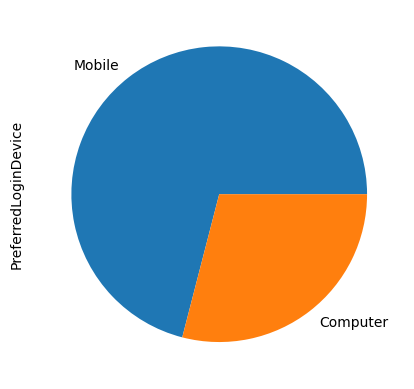

In [27]:
valuecount('PreferredLoginDevice')

,Proportion
CityTier,
1,0.651155
3,0.305861
2,0.042984


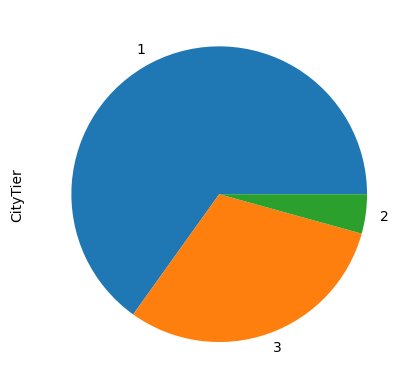

In [28]:
valuecount('CityTier')

,Proportion
PreferredPaymentMode,
Debit Card,0.411012
Credit Card,0.315098
E wallet,0.109059
Cash on Delivery,0.091297
UPI,0.073535


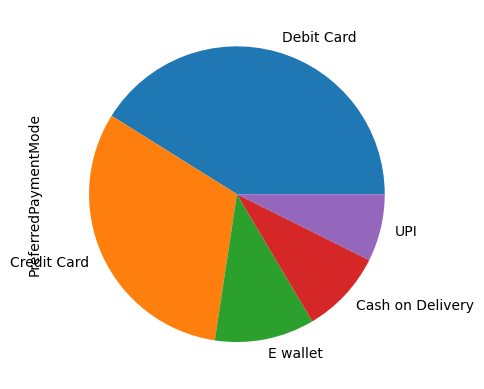

In [29]:
valuecount('PreferredPaymentMode')

,Proportion
Gender,
Male,0.601066
Female,0.398934


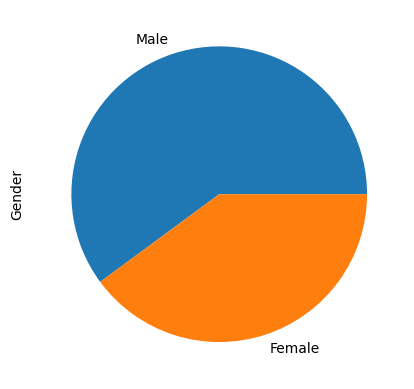

In [30]:
valuecount('Gender')

,Proportion
PreferredOrderCategory,
Mobile Phone,0.369449
Laptop & Accessory,0.364121
Fashion,0.146714
Grocery,0.072824
Others,0.046892


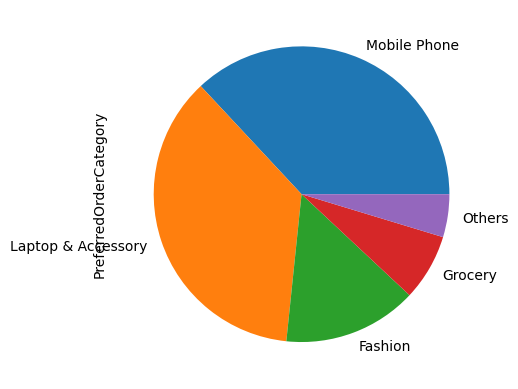

In [31]:
valuecount('PreferredOrderCategory')

,Proportion
SatisfactionScore,
3,0.301599
1,0.206750
5,0.196803
4,0.190764
2,0.104085


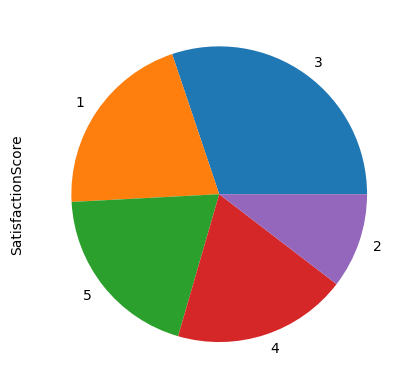

In [32]:
valuecount('SatisfactionScore')

,Proportion
MaritalStatus,
Married,0.530373
Single,0.319005
Divorced,0.150622


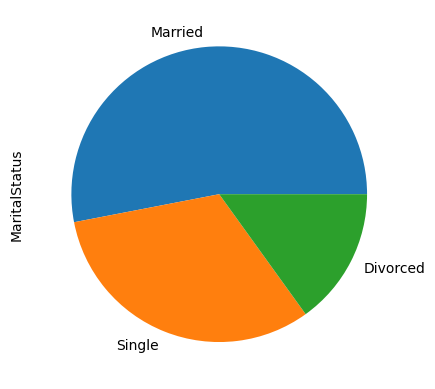

In [33]:
valuecount('MaritalStatus')

,Proportion
Complain,
0,0.715098
1,0.284902


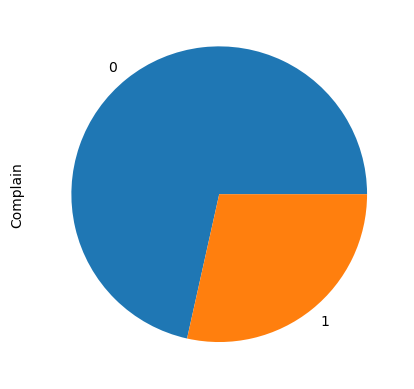

In [34]:
valuecount('Complain')

## Bivariate Analysis

#### CrossTab

In [35]:
def crosstab(x,y,z):
    """This function performs analysis between two given categorical columns (arguements - 'x' & 'y') of dataframe 'data' 
    in percentage form (arguement - 'z') accordingly"""
    ct=pd.crosstab(data[x],data[y],normalize=z)
    return ct

In [36]:
crosstab('CityTier','PreferredLoginDevice','index')

PreferredLoginDevice,Computer,Mobile
CityTier,,
1,0.291871,0.708129
2,0.264463,0.735537
3,0.290360,0.709640


In [37]:
crosstab('CityTier','PreferredPaymentMode','index')

PreferredPaymentMode,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
CityTier,,,,,
1,0.099836,0.376978,0.457174,0.000000,0.066012
2,0.066116,0.206612,0.256198,0.000000,0.471074
3,0.076655,0.198606,0.334495,0.356562,0.033682


In [38]:
crosstab('CityTier','PreferredOrderCategory','index')

PreferredOrderCategory,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Others
CityTier,,,,,
1,0.132570,0.072559,0.292962,0.450627,0.051282
2,0.099174,0.057851,0.198347,0.537190,0.107438
3,0.183508,0.075494,0.538908,0.173055,0.029036


In [39]:
crosstab('Gender','MaritalStatus','index')

MaritalStatus,Divorced,Married,Single
Gender,,,
Female,0.154942,0.507569,0.337489
Male,0.147754,0.545508,0.306738


In [40]:
crosstab('Gender','CityTier','columns')

CityTier,1,2,3
Gender,,,
Female,0.393344,0.305785,0.423926
Male,0.606656,0.694215,0.576074


In [41]:
crosstab('Gender','PreferredOrderCategory','index')

PreferredOrderCategory,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Others
Gender,,,,,
Female,0.157614,0.088157,0.375779,0.340160,0.03829
Male,0.139480,0.062648,0.356383,0.388889,0.05260


In [42]:
crosstab('PreferredLoginDevice','PreferredPaymentMode',True)

PreferredPaymentMode,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
PreferredLoginDevice,,,,,
Computer,0.024512,0.092362,0.126110,0.026288,0.020959
Mobile,0.066785,0.222735,0.284902,0.082771,0.052575


In [43]:
crosstab('Complain','CityTier','columns')

CityTier,1,2,3
Complain,,,
0,0.715221,0.743802,0.710801
1,0.284779,0.256198,0.289199


In [44]:
crosstab('CityTier','Churn','index')

Churn,0,1
CityTier,,
1,0.854883,0.145117
2,0.801653,0.198347
3,0.786295,0.213705


In [45]:
crosstab('Gender','Churn','index')

Churn,0,1
Gender,,
Female,0.845058,0.154942
Male,0.822695,0.177305


In [46]:
crosstab('PreferredOrderCategory','Churn','index')

Churn,0,1
PreferredOrderCategory,,
Fashion,0.845036,0.154964
Grocery,0.951220,0.048780
Laptop & Accessory,0.897561,0.102439
Mobile Phone,0.725962,0.274038
Others,0.924242,0.075758


In [47]:
crosstab('SatisfactionScore','Churn','index')

Churn,0,1
SatisfactionScore,,
1,0.884880,0.115120
2,0.873720,0.126280
3,0.828033,0.171967
4,0.828678,0.171322
5,0.761733,0.238267


In [48]:
crosstab('Complain','Churn','index')

Churn,0,1
Complain,,
0,0.890710,0.109290
1,0.683292,0.316708


#### Aggregation through Grouping

In [49]:
pd.DataFrame(data.groupby(['CityTier'])['SatisfactionScore'].mean())

,SatisfactionScore
CityTier,
1,3.073104
2,3.214876
3,3.032520


In [50]:
pd.DataFrame(data.groupby(['CityTier'])['WarehouseToHome'].mean())

,WarehouseToHome
CityTier,
1,15.597399
2,14.978632
3,15.818991


In [51]:
pd.DataFrame(data.groupby(['CityTier'])['HourSpendOnApp'].mean())

,HourSpendOnApp
CityTier,
1,2.937913
2,2.878924
3,2.925284


In [52]:
pd.DataFrame(data.groupby(['CityTier'])['OrderCountHikeFromLastYear'].mean())

,OrderCountHikeFromLastYear
CityTier,
1,15.809154
2,15.100000
3,15.577499


In [53]:
pd.DataFrame(data.groupby(['CityTier'])['CouponUsed'].sum())

,CouponUsed
CityTier,
1,6041.0
2,339.0
3,3030.0


In [54]:
pd.DataFrame(data.groupby(['CityTier'])['OrderCount'].sum())

,OrderCount
CityTier,
1,10298.0
2,615.0
3,5246.0


# Converting Data into Machine Learning Readable Format

In [55]:
data_ml=data.copy()

## Missing Value Treatment

In [56]:
data_ml.isnull().sum()

CustomerID                      0
Churn                           0
Tenure                        264
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome               251
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                255
NumberOfDeviceRegistered        0
PreferredOrderCategory          0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderCountHikeFromLastYear    265
CouponUsed                    256
OrderCount                    258
DaySinceLastOrder             307
CashbackAmount                  0
dtype: int64

In [57]:
(data_ml.shape[0]-data_ml.dropna().shape[0])/data_ml.shape[0] # to check the percentage of missing values in the dataframe

0.32966252220248665

In [58]:
data_ml.dtypes

CustomerID                      int64
Churn                           int64
Tenure                        float64
PreferredLoginDevice           object
CityTier                        int64
WarehouseToHome               float64
PreferredPaymentMode           object
Gender                         object
HourSpendOnApp                float64
NumberOfDeviceRegistered        int64
PreferredOrderCategory         object
SatisfactionScore               int64
MaritalStatus                  object
NumberOfAddress                 int64
Complain                        int64
OrderCountHikeFromLastYear    float64
CouponUsed                    float64
OrderCount                    float64
DaySinceLastOrder             float64
CashbackAmount                float64
dtype: object

In [59]:
def mean_fill(col):
    """This function fills missing values of the given numerical column (arguement - 'col') of dataframe 'data_ml' by its 
    mean"""
    data_ml[col].fillna(round(data_ml[col].mean(),2),inplace=True)

In [60]:
mean_fill('Tenure')
mean_fill('WarehouseToHome')
mean_fill('HourSpendOnApp')
mean_fill('OrderCountHikeFromLastYear')

In [61]:
def median_fill(col):
    """This function fills missing values of the given numerical column (arguement - 'col') of dataframe 'data_ml' by its 
    median"""
    data_ml[col].fillna(data_ml[col].median(),inplace=True)

In [62]:
median_fill('CouponUsed')
median_fill('OrderCount')
median_fill('DaySinceLastOrder')

In [63]:
data_ml.isnull().sum()

CustomerID                    0
Churn                         0
Tenure                        0
PreferredLoginDevice          0
CityTier                      0
WarehouseToHome               0
PreferredPaymentMode          0
Gender                        0
HourSpendOnApp                0
NumberOfDeviceRegistered      0
PreferredOrderCategory        0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
OrderCountHikeFromLastYear    0
CouponUsed                    0
OrderCount                    0
DaySinceLastOrder             0
CashbackAmount                0
dtype: int64

#### Exporting Data for Further Analysis in SQL (after Missing Value Treatment)

In [64]:
data_churn=data_ml.copy()

In [65]:
data_churn.to_csv(r'C:\Users\Sahil Kumar\OneDrive\Desktop\Data Science\Semester-2\Capstone Project 1\ecom_churn.csv',
                  index=False)

## Multi-Collinearity Treatment

#### Multivariate Analysis

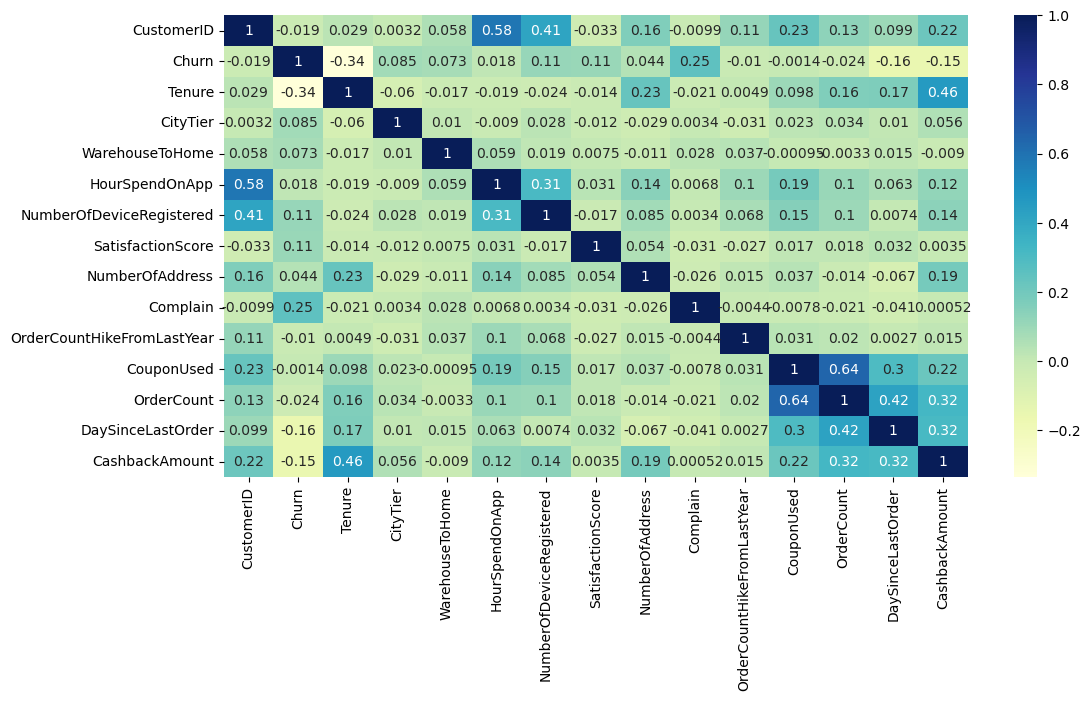

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(data_ml.corr(),annot=True,cmap="YlGnBu")
plt.show()

## Outlier Treatment

In [67]:
data_ml.describe(percentiles=[.003,.01,.02,.03,.04,.05,.95,.96,.97,.98,.99,.997]).T

,count,mean,std,min,0.3%,1%,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,99.7%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,50017.887,50057.29,50113.5800,50169.87,50226.1600,50282.4500,52815.50,55348.5500,55404.84,55461.13,55517.4200,55573.7100,55613.113,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.000,0.00,0.0000,0.00,0.0000,0.0000,0.00,1.0000,1.00,1.00,1.0000,1.0000,1.000,1.00
Tenure,5630.0,10.189904,8.354164,0.0,0.000,0.00,0.0000,0.00,0.0000,0.0000,9.00,27.0000,28.00,29.00,30.0000,30.0000,31.000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.000,1.00,1.0000,1.00,1.0000,1.0000,1.00,3.0000,3.00,3.00,3.0000,3.0000,3.000,3.00
WarehouseToHome,5630.0,15.639901,8.339095,5.0,6.000,6.00,6.0000,6.00,6.0000,6.0000,14.00,32.0000,33.00,34.00,35.0000,35.0000,36.000,127.00
HourSpendOnApp,5630.0,2.931465,0.705384,0.0,1.000,2.00,2.0000,2.00,2.0000,2.0000,3.00,4.0000,4.00,4.00,4.0000,4.0000,4.000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,1.000,1.00,1.0000,1.00,1.0000,2.0000,4.00,5.0000,5.00,5.00,6.0000,6.0000,6.000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,1.000,1.00,1.0000,1.00,1.0000,1.0000,3.00,5.0000,5.00,5.00,5.0000,5.0000,5.000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,1.000,1.00,1.0000,1.00,1.0000,1.0000,3.00,10.0000,10.00,10.00,10.0000,11.0000,11.000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.000,0.00,0.0000,0.00,0.0000,0.0000,0.00,1.0000,1.00,1.00,1.0000,1.0000,1.000,1.00


In [68]:
obj_data=data_ml[data_ml.dtypes[data_ml.dtypes=='object'].index]
num_data=data_ml[data_ml.dtypes[data_ml.dtypes!='object'].index]

In [69]:
def outlier_min_cap(x):
    """This function performs lower side outlier capping at 0.3% for the given column (arguement - 'x') of dataframe 
    'num_data'"""
    num_data[x]=np.where(num_data[x]<num_data[x].quantile(.003),num_data[x].quantile(.003),num_data[x])

In [70]:
outlier_min_cap('CashbackAmount')

C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_292\878728059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[x]=np.where(num_data[x]<num_data[x].quantile(.003),num_data[x].quantile(.003),num_data[x])


In [71]:
def outlier_max_cap(x):
    """This function performs upper side outlier capping at 99.7% for the given column (arguement - 'x') of dataframe 
    'num_data'"""
    num_data[x]=np.where(num_data[x]>num_data[x].quantile(.997),num_data[x].quantile(.997),num_data[x])
    return x

In [72]:
outlier_max_cap('Tenure')
outlier_max_cap('WarehouseToHome')
outlier_max_cap('NumberOfAddress')
outlier_max_cap('DaySinceLastOrder')

C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_292\2345889696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[x]=np.where(num_data[x]>num_data[x].quantile(.997),num_data[x].quantile(.997),num_data[x])


'DaySinceLastOrder'

In [73]:
finaldata=pd.concat([obj_data,num_data],axis=1)

In [74]:
finaldata.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferredOrderCategory,MaritalStatus,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderCountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,Mobile,Debit Card,Female,Laptop & Accessory,Single,50001,1,4.00,3,6.0,3.00,3,2,9.0,1,11.0,1.0,1.0,5.0,159.93
1,Mobile,UPI,Male,Mobile Phone,Single,50002,1,10.19,1,8.0,3.00,4,3,7.0,1,15.0,0.0,1.0,0.0,120.90
2,Mobile,Debit Card,Male,Mobile Phone,Single,50003,1,10.19,1,30.0,2.00,4,3,6.0,1,14.0,0.0,1.0,3.0,120.28
3,Mobile,Debit Card,Male,Laptop & Accessory,Single,50004,1,0.00,3,15.0,2.00,4,5,8.0,0,23.0,0.0,1.0,3.0,134.07
4,Mobile,Credit Card,Male,Mobile Phone,Single,50005,1,0.00,1,12.0,2.93,3,5,3.0,0,11.0,1.0,1.0,3.0,129.60


In [75]:
finaldata.drop(columns='CustomerID',inplace=True)

## Checking and Treating Data Imbalance using SMOTE

In [76]:
finaldata['Churn'].value_counts(dropna=False)

0    4682
1     948
Name: Churn, dtype: int64

In [77]:
add=finaldata[(finaldata['Churn']==1)]

In [78]:
finaldata_ml=pd.concat([finaldata,add,add,add,add])

In [79]:
finaldata_ml['Churn'].value_counts(dropna=False)

1    4740
0    4682
Name: Churn, dtype: int64

## Creating Dummies of all Categorical Columns having non-binary format

In [80]:
finaldata_ml.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferredOrderCategory,MaritalStatus,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderCountHikeFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,Mobile,Debit Card,Female,Laptop & Accessory,Single,1,4.00,3,6.0,3.00,3,2,9.0,1,11.0,1.0,1.0,5.0,159.93
1,Mobile,UPI,Male,Mobile Phone,Single,1,10.19,1,8.0,3.00,4,3,7.0,1,15.0,0.0,1.0,0.0,120.90
2,Mobile,Debit Card,Male,Mobile Phone,Single,1,10.19,1,30.0,2.00,4,3,6.0,1,14.0,0.0,1.0,3.0,120.28
3,Mobile,Debit Card,Male,Laptop & Accessory,Single,1,0.00,3,15.0,2.00,4,5,8.0,0,23.0,0.0,1.0,3.0,134.07
4,Mobile,Credit Card,Male,Mobile Phone,Single,1,0.00,1,12.0,2.93,3,5,3.0,0,11.0,1.0,1.0,3.0,129.60


In [81]:
mldata=pd.get_dummies(data=finaldata_ml,columns=['PreferredLoginDevice','PreferredPaymentMode',
                                                 'Gender','PreferredOrderCategory','MaritalStatus','CityTier'],
                      drop_first=True)

# Model Development & Evaluation

In [82]:
x=mldata.drop(columns='Churn')
y=mldata['Churn']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

## Logistic Regression

In [84]:
lg=LogisticRegression()

In [85]:
lg.fit(x_train,y_train)

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
lg.coef_

array([[-0.15182233,  0.03295797, -0.35432802,  0.30284011,  0.19457164,
         0.19830288,  1.48030053, -0.03372561,  0.0564036 ,  0.15119491,
        -0.14265266, -0.00497381, -0.2561921 , -0.36638974, -0.1792266 ,
         0.31167488, -0.07035629,  0.18451982,  0.0063505 , -0.88030818,
         0.35654234,  0.21442429, -0.60416466,  0.6360573 ,  0.03490114,
         0.51426848]])

In [87]:
lg.intercept_

array([-0.03840378])

In [88]:
lg.score(x_train,y_train)

0.8071044438154543

In [89]:
lg.score(x_test,y_test)

0.7992359932088285

In [90]:
pred_train=lg.predict(x_train)

In [91]:
pred_test=lg.predict(x_test)

In [92]:
cm_train=metrics.confusion_matrix(y_train,pred_train)
pd.DataFrame(cm_train,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

,Predicted_0,Predicted_1
Actual_0,2812,710
Actual_1,653,2891


In [93]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3522
           1       0.80      0.82      0.81      3544

    accuracy                           0.81      7066
   macro avg       0.81      0.81      0.81      7066
weighted avg       0.81      0.81      0.81      7066



In [94]:
cm_test=metrics.confusion_matrix(y_test,pred_test)
pd.DataFrame(cm_test,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

,Predicted_0,Predicted_1
Actual_0,924,236
Actual_1,237,959


In [95]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1160
           1       0.80      0.80      0.80      1196

    accuracy                           0.80      2356
   macro avg       0.80      0.80      0.80      2356
weighted avg       0.80      0.80      0.80      2356



In [96]:
prob_train=pd.DataFrame(lg.predict_proba(x_train),columns=['Prob_0','Prob_1'])
prob_train

,Prob_0,Prob_1
0,0.454579,0.545421
1,0.416190,0.583810
2,0.556478,0.443522
3,0.304526,0.695474
4,0.979328,0.020672
...,...,...
7061,0.293889,0.706111
7062,0.511787,0.488213
7063,0.996573,0.003427
7064,0.840827,0.159173


In [97]:
fpr,tpr,_=metrics.roc_curve(y_train,prob_train['Prob_1'])
auc=metrics.auc(fpr,tpr)
auc

0.8871347851556741

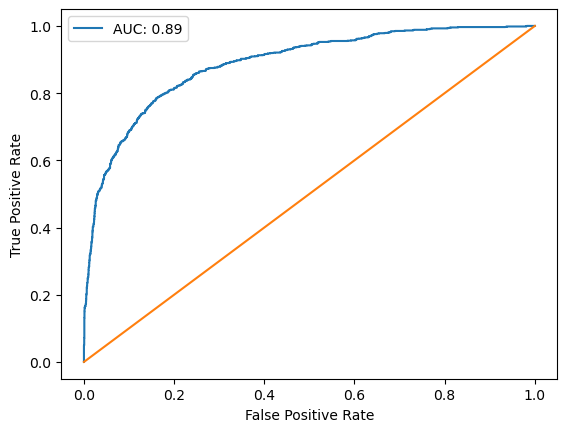

In [98]:
plt.plot(fpr,tpr,label='AUC: '+str(round(auc,2)))
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [99]:
prob_test=pd.DataFrame(lg.predict_proba(x_test),columns=['Prob_0','Prob_1'])
prob_test

,Prob_0,Prob_1
0,0.177122,0.822878
1,0.547878,0.452122
2,0.487507,0.512493
3,0.873842,0.126158
4,0.813506,0.186494
...,...,...
2351,0.688778,0.311222
2352,0.382105,0.617895
2353,0.256551,0.743449
2354,0.738362,0.261638


In [100]:
fpr1,tpr1,_=metrics.roc_curve(y_test,prob_test['Prob_1'])
auc1=metrics.auc(fpr1,tpr1)
auc1

0.8812254930227194

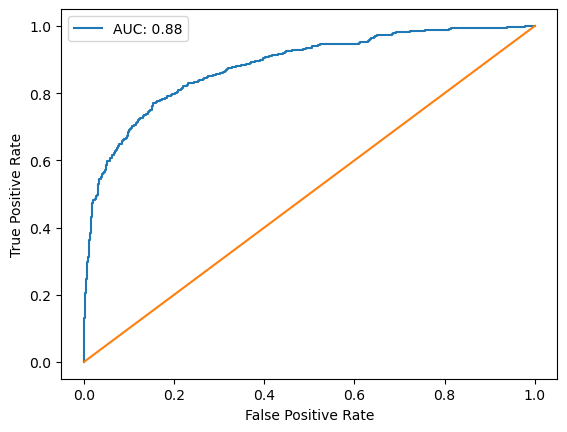

In [101]:
plt.plot(fpr1,tpr1,label='AUC: '+str(round(auc1,2)))
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## BootStrap Aggregation - Logistic Regression

In [102]:
bag_lg=BaggingClassifier(base_estimator=lg,n_estimators=1000)

In [103]:
bag_lg.fit(x_train,y_train)

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahil Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=1000)

In [104]:
bag_lg.score(x_train,y_train)

0.8103594678743278

In [105]:
bag_lg.score(x_test,y_test)

0.8043293718166383

In [106]:
pred_train_bag=bag_lg.predict(x_train)

In [107]:
pred_test_bag=bag_lg.predict(x_test)

In [108]:
cm_train_bag=metrics.confusion_matrix(y_train,pred_train_bag)
pd.DataFrame(cm_train_bag,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

,Predicted_0,Predicted_1
Actual_0,2805,717
Actual_1,623,2921


In [109]:
print(metrics.classification_report(y_train,pred_train_bag))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3522
           1       0.80      0.82      0.81      3544

    accuracy                           0.81      7066
   macro avg       0.81      0.81      0.81      7066
weighted avg       0.81      0.81      0.81      7066



In [110]:
cm_test_bag=metrics.confusion_matrix(y_test,pred_test_bag)
pd.DataFrame(cm_test_bag,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

,Predicted_0,Predicted_1
Actual_0,926,234
Actual_1,227,969


In [111]:
print(metrics.classification_report(y_test,pred_test_bag))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1160
           1       0.81      0.81      0.81      1196

    accuracy                           0.80      2356
   macro avg       0.80      0.80      0.80      2356
weighted avg       0.80      0.80      0.80      2356



## Decision Tree Classifier

In [112]:
dtc=DecisionTreeClassifier()

In [113]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
dtc.score(x_train,y_train)

1.0

In [115]:
dtc.score(x_test,y_test)

0.9847198641765704

In [116]:
pred_train_dtc=dtc.predict(x_train)

In [117]:
pred_test_dtc=dtc.predict(x_test)

In [118]:
cm_train_dtc=metrics.confusion_matrix(y_train,pred_train_dtc)
pd.DataFrame(cm_train_dtc,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

,Predicted_0,Predicted_1
Actual_0,3522,0
Actual_1,0,3544


In [119]:
print(metrics.classification_report(y_train,pred_train_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3522
           1       1.00      1.00      1.00      3544

    accuracy                           1.00      7066
   macro avg       1.00      1.00      1.00      7066
weighted avg       1.00      1.00      1.00      7066



In [120]:
cm_test_dtc=metrics.confusion_matrix(y_test,pred_test_dtc)
pd.DataFrame(cm_test_dtc,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

,Predicted_0,Predicted_1
Actual_0,1124,36
Actual_1,0,1196


In [121]:
print(metrics.classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1160
           1       0.97      1.00      0.99      1196

    accuracy                           0.98      2356
   macro avg       0.99      0.98      0.98      2356
weighted avg       0.99      0.98      0.98      2356



In [122]:
from sklearn.tree import plot_tree

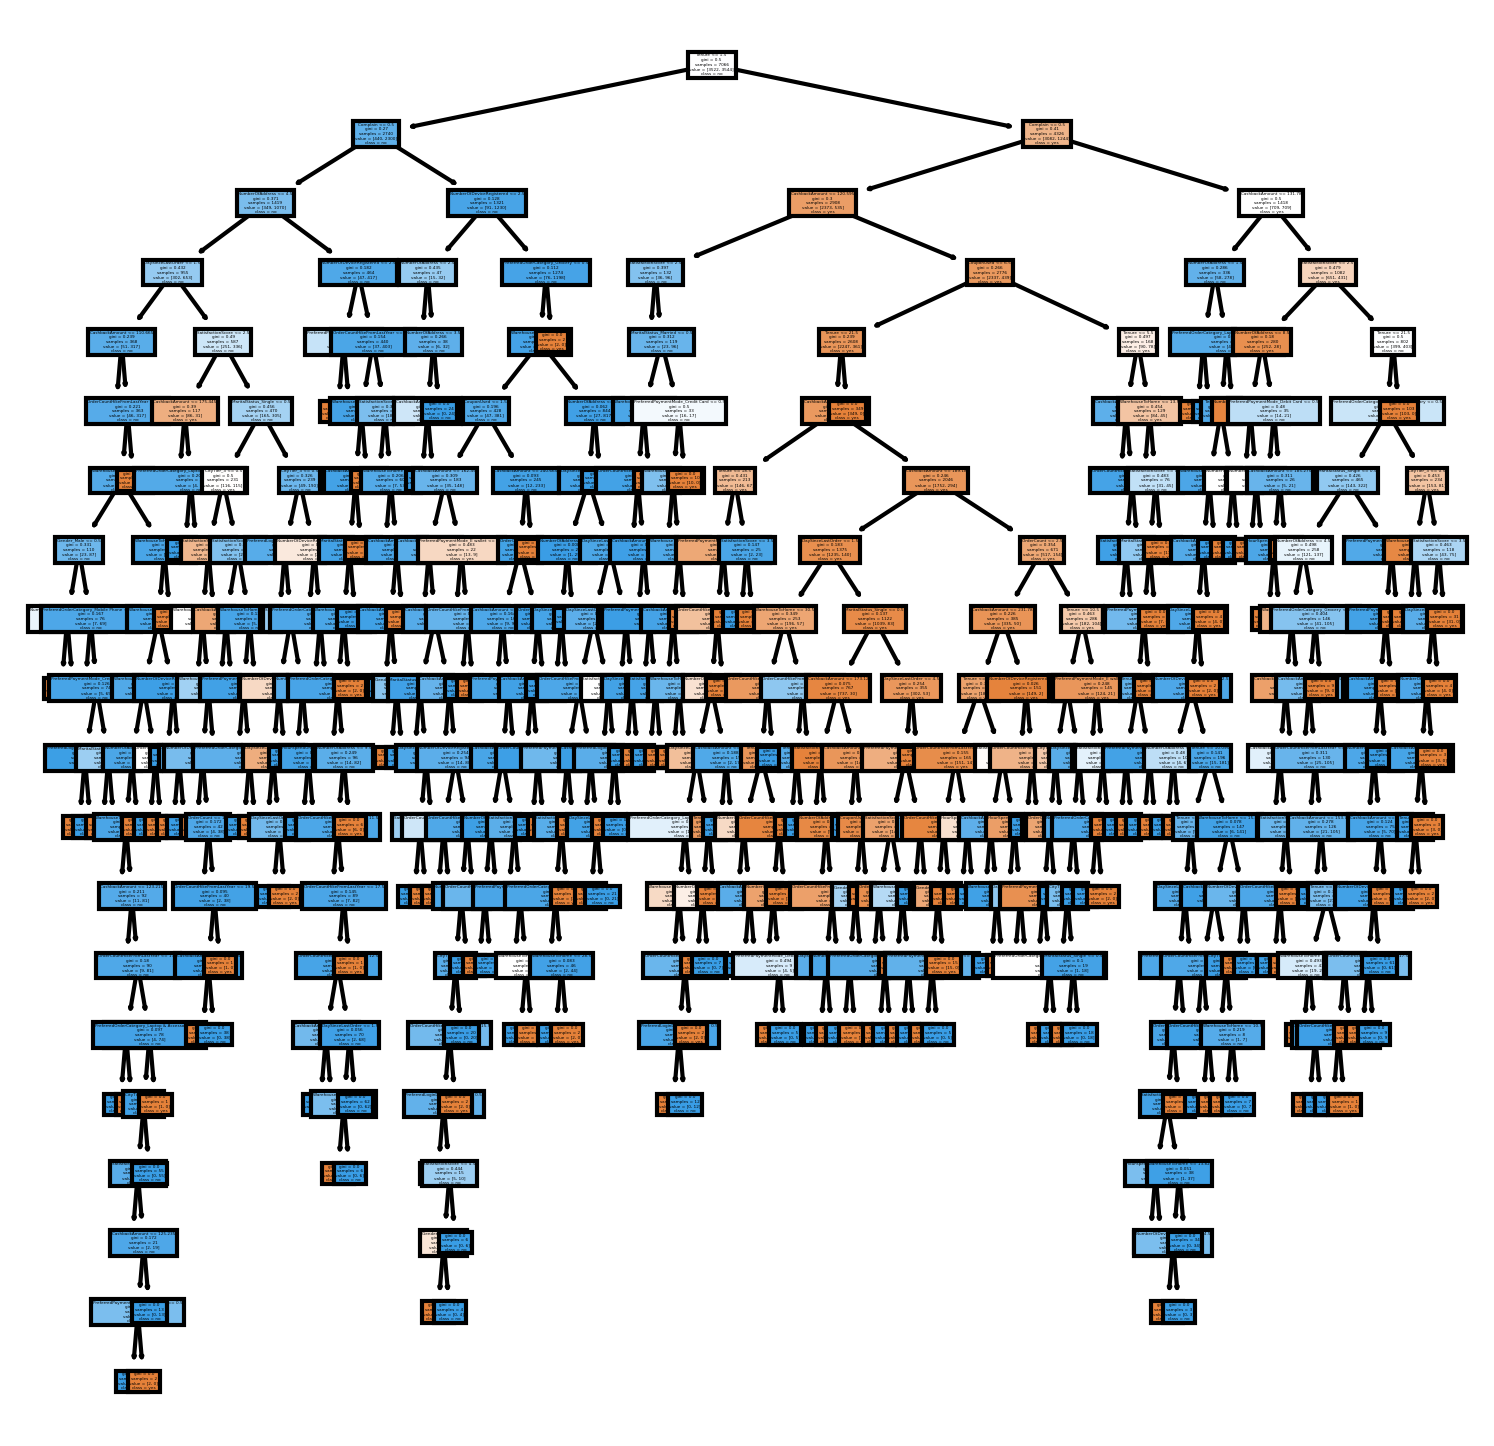

In [123]:
fn=x_train.columns
cn=['yes','no']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=300)
dtc_tree=plot_tree(dtc,feature_names=fn,class_names=cn,filled=True)

In [124]:
feat_imp=pd.DataFrame({'Features':x_train.columns,'Importance':dtc.feature_importances_}).set_index(['Features'])
feat_imp.sort_values(by=['Importance'],ascending=False)

,Importance
Features,
Tenure,0.352261
CashbackAmount,0.119689
SatisfactionScore,0.083989
Complain,0.066032
NumberOfAddress,0.055200
WarehouseToHome,0.053989
DaySinceLastOrder,0.033063
OrderCountHikeFromLastYear,0.033037
CityTier_3,0.023773


## BootStrap Aggregation - Decision Tree Classifier

In [125]:
bag_dtc=BaggingClassifier(base_estimator=dtc,n_estimators=1000)

In [126]:
bag_dtc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)

In [127]:
bag_dtc.score(x_train,y_train)

1.0

In [128]:
bag_dtc.score(x_test,y_test)

0.9902376910016978

In [129]:
pred_train_bagdtc=bag_dtc.predict(x_train)

In [130]:
pred_test_bagdtc=bag_dtc.predict(x_test)

In [131]:
cm_train_bagdtc=metrics.confusion_matrix(y_train,pred_train_bagdtc)
pd.DataFrame(cm_train_bagdtc,columns=['Prediction_0','Prediction_1'],index=['Actual_0','Actual_1'])

,Prediction_0,Prediction_1
Actual_0,3522,0
Actual_1,0,3544


In [132]:
print(metrics.classification_report(y_train,pred_train_bagdtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3522
           1       1.00      1.00      1.00      3544

    accuracy                           1.00      7066
   macro avg       1.00      1.00      1.00      7066
weighted avg       1.00      1.00      1.00      7066



In [133]:
cm_test_bagdtc=metrics.confusion_matrix(y_test,pred_test_bagdtc)
pd.DataFrame(cm_test_bagdtc,columns=['Prediction_0','Prediction_1'],index=['Actual_0','Actual_1'])

,Prediction_0,Prediction_1
Actual_0,1137,23
Actual_1,0,1196


In [134]:
print(metrics.classification_report(y_test,pred_test_bagdtc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1160
           1       0.98      1.00      0.99      1196

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356



## Random Forest Classifier

In [135]:
rfc=RandomForestClassifier()

In [136]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [137]:
rfc.score(x_train,y_train)

1.0

In [138]:
rfc.score(x_test,y_test)

0.9910865874363328

In [139]:
pred_train_rfc=rfc.predict(x_train)

In [140]:
pred_test_rfc=rfc.predict(x_test)

In [141]:
cm_train_rfc=metrics.confusion_matrix(y_train,pred_train_rfc)
pd.DataFrame(cm_train_rfc,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

,Predicted_0,Predicted_1
Actual_0,3522,0
Actual_1,0,3544


In [142]:
print(metrics.classification_report(y_train,pred_train_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3522
           1       1.00      1.00      1.00      3544

    accuracy                           1.00      7066
   macro avg       1.00      1.00      1.00      7066
weighted avg       1.00      1.00      1.00      7066



In [143]:
cm_test_rfc=metrics.confusion_matrix(y_test,pred_test_rfc)
pd.DataFrame(cm_test_rfc,columns=['Predicted_0','Predicted_1'],index=['Actual_0','Actual_1'])

,Predicted_0,Predicted_1
Actual_0,1139,21
Actual_1,0,1196


In [144]:
print(metrics.classification_report(y_test,pred_test_rfc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1160
           1       0.98      1.00      0.99      1196

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

